### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

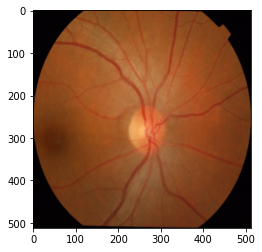

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
sat_channel_train = convert_to_hsv(1, img_train)
len(sat_channel_train)

50

### Test images

In [5]:
sat_channel_test = convert_to_hsv(1, img_test)
len(sat_channel_test)

51

#### Generator of augmented data:

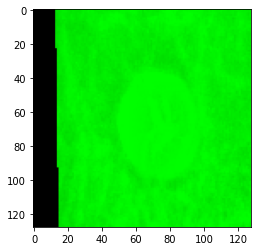

In [6]:
gen = data_generator(sat_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


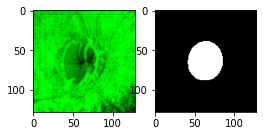

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(sat_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(sat_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_saturation', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 31s 282ms/step - loss: 1.5348 - mean_IOU_gpu: 0.0449 - dice_metric: 0.0844 - val_loss: 1.4565 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 26s 263ms/step - loss: 1.4787 - mean_IOU_gpu: 1.1226e-04 - dice_metric: 2.2415e-04 - val_loss: 1.4158 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 29s 294ms/step - loss: 1.5390 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.3616 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 29s 289ms/step - loss: 1.4358 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_loss: 1.3283 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 29s 288ms/step - loss: 1.4571 - mean_IOU_gpu: 0.0000e+00 - dice_metric: 0.0000e+00 - val_lo

99/99 [==============================] - 29s 294ms/step - loss: 0.3813 - mean_IOU_gpu: 0.5072 - dice_metric: 0.6562 - val_loss: 0.7047 - val_mean_IOU_gpu: 0.1726 - val_dice_metric: 0.2507
Epoch 40/500
99/99 [==============================] - 30s 302ms/step - loss: 0.4528 - mean_IOU_gpu: 0.4592 - dice_metric: 0.6078 - val_loss: 2.9474 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 41/500
99/99 [==============================] - 30s 299ms/step - loss: 0.4253 - mean_IOU_gpu: 0.4809 - dice_metric: 0.6312 - val_loss: 2.7676 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 42/500
99/99 [==============================] - 30s 300ms/step - loss: 0.3475 - mean_IOU_gpu: 0.5228 - dice_metric: 0.6730 - val_loss: 1.5009 - val_mean_IOU_gpu: 0.0107 - val_dice_metric: 0.0193
Epoch 43/500
99/99 [==============================] - 28s 288ms/step - loss: 0.3475 - mean_IOU_gpu: 0.5120 - dice_metric: 0.6662 - val_loss: 2.4540 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_met

Epoch 80/500
99/99 [==============================] - 30s 302ms/step - loss: 0.2969 - mean_IOU_gpu: 0.5530 - dice_metric: 0.6997 - val_loss: 0.4521 - val_mean_IOU_gpu: 0.4156 - val_dice_metric: 0.5055
Epoch 81/500
99/99 [==============================] - 30s 304ms/step - loss: 0.2879 - mean_IOU_gpu: 0.5696 - dice_metric: 0.7131 - val_loss: 0.5720 - val_mean_IOU_gpu: 0.3306 - val_dice_metric: 0.4277
Epoch 82/500
99/99 [==============================] - 30s 301ms/step - loss: 0.2945 - mean_IOU_gpu: 0.5624 - dice_metric: 0.7068 - val_loss: 0.4743 - val_mean_IOU_gpu: 0.4059 - val_dice_metric: 0.4976
Epoch 83/500
99/99 [==============================] - 29s 292ms/step - loss: 0.3452 - mean_IOU_gpu: 0.5209 - dice_metric: 0.6692 - val_loss: 0.5184 - val_mean_IOU_gpu: 0.3625 - val_dice_metric: 0.4574
Epoch 84/500
99/99 [==============================] - 30s 300ms/step - loss: 0.2778 - mean_IOU_gpu: 0.5797 - dice_metric: 0.7207 - val_loss: 0.5168 - val_mean_IOU_gpu: 0.3795 - val_dice_metric: 0.

Epoch 121/500
99/99 [==============================] - 30s 302ms/step - loss: 0.2890 - mean_IOU_gpu: 0.5695 - dice_metric: 0.7124 - val_loss: 0.3217 - val_mean_IOU_gpu: 0.5696 - val_dice_metric: 0.6756
Epoch 122/500
99/99 [==============================] - 30s 305ms/step - loss: 0.2691 - mean_IOU_gpu: 0.5858 - dice_metric: 0.7270 - val_loss: 0.3922 - val_mean_IOU_gpu: 0.4580 - val_dice_metric: 0.5549
Epoch 123/500
99/99 [==============================] - 30s 303ms/step - loss: 0.2846 - mean_IOU_gpu: 0.5687 - dice_metric: 0.7124 - val_loss: 0.4821 - val_mean_IOU_gpu: 0.3457 - val_dice_metric: 0.4436
Epoch 124/500
99/99 [==============================] - 30s 304ms/step - loss: 0.2738 - mean_IOU_gpu: 0.5646 - dice_metric: 0.7112 - val_loss: 0.3082 - val_mean_IOU_gpu: 0.5971 - val_dice_metric: 0.7032
Epoch 125/500
99/99 [==============================] - 29s 296ms/step - loss: 0.2759 - mean_IOU_gpu: 0.5807 - dice_metric: 0.7221 - val_loss: 0.4042 - val_mean_IOU_gpu: 0.4396 - val_dice_metri

99/99 [==============================] - 30s 303ms/step - loss: 0.2525 - mean_IOU_gpu: 0.5927 - dice_metric: 0.7327 - val_loss: 0.3031 - val_mean_IOU_gpu: 0.5651 - val_dice_metric: 0.6872
Epoch 162/500
99/99 [==============================] - 30s 304ms/step - loss: 0.2844 - mean_IOU_gpu: 0.5834 - dice_metric: 0.7212 - val_loss: 0.3679 - val_mean_IOU_gpu: 0.5061 - val_dice_metric: 0.6128
Epoch 163/500
99/99 [==============================] - 30s 304ms/step - loss: 0.2583 - mean_IOU_gpu: 0.5859 - dice_metric: 0.7289 - val_loss: 0.3395 - val_mean_IOU_gpu: 0.5625 - val_dice_metric: 0.6674
Epoch 164/500
99/99 [==============================] - 29s 293ms/step - loss: 0.2668 - mean_IOU_gpu: 0.5945 - dice_metric: 0.7317 - val_loss: 0.3100 - val_mean_IOU_gpu: 0.6061 - val_dice_metric: 0.7113
Epoch 165/500
99/99 [==============================] - 29s 291ms/step - loss: 0.3369 - mean_IOU_gpu: 0.5554 - dice_metric: 0.6998 - val_loss: 0.2890 - val_mean_IOU_gpu: 0.6459 - val_dice_metric: 0.7467
Epoc

Epoch 202/500
99/99 [==============================] - 30s 303ms/step - loss: 0.2584 - mean_IOU_gpu: 0.6026 - dice_metric: 0.7389 - val_loss: 0.3270 - val_mean_IOU_gpu: 0.5623 - val_dice_metric: 0.6808
Epoch 203/500
99/99 [==============================] - 30s 300ms/step - loss: 0.2369 - mean_IOU_gpu: 0.6179 - dice_metric: 0.7521 - val_loss: 0.3306 - val_mean_IOU_gpu: 0.5531 - val_dice_metric: 0.6736
Epoch 204/500
99/99 [==============================] - 30s 305ms/step - loss: 0.2865 - mean_IOU_gpu: 0.5755 - dice_metric: 0.7165 - val_loss: 0.3281 - val_mean_IOU_gpu: 0.5731 - val_dice_metric: 0.6871
Epoch 205/500
99/99 [==============================] - 30s 305ms/step - loss: 0.2606 - mean_IOU_gpu: 0.5936 - dice_metric: 0.7314 - val_loss: 0.3356 - val_mean_IOU_gpu: 0.5684 - val_dice_metric: 0.6845
Epoch 206/500
99/99 [==============================] - 30s 302ms/step - loss: 0.2713 - mean_IOU_gpu: 0.5825 - dice_metric: 0.7246 - val_loss: 0.3201 - val_mean_IOU_gpu: 0.5784 - val_dice_metri

99/99 [==============================] - 30s 305ms/step - loss: 0.2399 - mean_IOU_gpu: 0.6195 - dice_metric: 0.7521 - val_loss: 0.3449 - val_mean_IOU_gpu: 0.4991 - val_dice_metric: 0.6448
Epoch 243/500
99/99 [==============================] - 29s 296ms/step - loss: 0.2535 - mean_IOU_gpu: 0.6003 - dice_metric: 0.7382 - val_loss: 0.3396 - val_mean_IOU_gpu: 0.5060 - val_dice_metric: 0.6471
Epoch 244/500
99/99 [==============================] - 29s 294ms/step - loss: 0.2382 - mean_IOU_gpu: 0.6099 - dice_metric: 0.7471 - val_loss: 0.3120 - val_mean_IOU_gpu: 0.5412 - val_dice_metric: 0.6763
Epoch 245/500
99/99 [==============================] - 30s 307ms/step - loss: 0.2322 - mean_IOU_gpu: 0.6264 - dice_metric: 0.7598 - val_loss: 0.3384 - val_mean_IOU_gpu: 0.4996 - val_dice_metric: 0.6412
Epoch 246/500
99/99 [==============================] - 30s 301ms/step - loss: 0.2421 - mean_IOU_gpu: 0.6019 - dice_metric: 0.7420 - val_loss: 0.3118 - val_mean_IOU_gpu: 0.5486 - val_dice_metric: 0.6786
Epoc

Epoch 283/500
99/99 [==============================] - 29s 297ms/step - loss: 0.2458 - mean_IOU_gpu: 0.6157 - dice_metric: 0.7504 - val_loss: 0.3745 - val_mean_IOU_gpu: 0.5020 - val_dice_metric: 0.6411
Epoch 284/500
99/99 [==============================] - 30s 303ms/step - loss: 0.2554 - mean_IOU_gpu: 0.5996 - dice_metric: 0.7372 - val_loss: 0.3128 - val_mean_IOU_gpu: 0.5615 - val_dice_metric: 0.6818
Epoch 285/500
99/99 [==============================] - 31s 312ms/step - loss: 0.2605 - mean_IOU_gpu: 0.5881 - dice_metric: 0.7295 - val_loss: 0.3517 - val_mean_IOU_gpu: 0.5263 - val_dice_metric: 0.6595
Epoch 286/500
99/99 [==============================] - 30s 304ms/step - loss: 0.2267 - mean_IOU_gpu: 0.6179 - dice_metric: 0.7544 - val_loss: 0.3977 - val_mean_IOU_gpu: 0.4679 - val_dice_metric: 0.6104
Epoch 287/500
99/99 [==============================] - 31s 309ms/step - loss: 0.2268 - mean_IOU_gpu: 0.6195 - dice_metric: 0.7564 - val_loss: 0.3373 - val_mean_IOU_gpu: 0.5357 - val_dice_metri

99/99 [==============================] - 31s 316ms/step - loss: 0.2159 - mean_IOU_gpu: 0.6339 - dice_metric: 0.7673 - val_loss: 0.4101 - val_mean_IOU_gpu: 0.4699 - val_dice_metric: 0.6069
Epoch 324/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1969 - mean_IOU_gpu: 0.6543 - dice_metric: 0.7834 - val_loss: 0.4212 - val_mean_IOU_gpu: 0.4721 - val_dice_metric: 0.6032
Epoch 325/500
99/99 [==============================] - 31s 318ms/step - loss: 0.2329 - mean_IOU_gpu: 0.6215 - dice_metric: 0.7557 - val_loss: 0.4395 - val_mean_IOU_gpu: 0.4643 - val_dice_metric: 0.5874
Epoch 326/500
99/99 [==============================] - 30s 307ms/step - loss: 0.2366 - mean_IOU_gpu: 0.6317 - dice_metric: 0.7623 - val_loss: 0.3862 - val_mean_IOU_gpu: 0.4956 - val_dice_metric: 0.6294
Epoch 327/500
99/99 [==============================] - 31s 315ms/step - loss: 0.2366 - mean_IOU_gpu: 0.6075 - dice_metric: 0.7468 - val_loss: 0.3794 - val_mean_IOU_gpu: 0.4882 - val_dice_metric: 0.6254
Epoc

Epoch 364/500
99/99 [==============================] - 31s 318ms/step - loss: 0.2236 - mean_IOU_gpu: 0.6246 - dice_metric: 0.7594 - val_loss: 0.4851 - val_mean_IOU_gpu: 0.4130 - val_dice_metric: 0.5559
Epoch 365/500
99/99 [==============================] - 31s 314ms/step - loss: 0.2186 - mean_IOU_gpu: 0.6403 - dice_metric: 0.7695 - val_loss: 0.5725 - val_mean_IOU_gpu: 0.3574 - val_dice_metric: 0.4989
Epoch 366/500
99/99 [==============================] - 31s 315ms/step - loss: 0.2147 - mean_IOU_gpu: 0.6441 - dice_metric: 0.7723 - val_loss: 0.5578 - val_mean_IOU_gpu: 0.3990 - val_dice_metric: 0.5335
Epoch 367/500
99/99 [==============================] - 31s 313ms/step - loss: 0.2051 - mean_IOU_gpu: 0.6424 - dice_metric: 0.7742 - val_loss: 0.5906 - val_mean_IOU_gpu: 0.3599 - val_dice_metric: 0.4954
Epoch 368/500
99/99 [==============================] - 31s 310ms/step - loss: 0.2777 - mean_IOU_gpu: 0.6045 - dice_metric: 0.7370 - val_loss: 0.5265 - val_mean_IOU_gpu: 0.4028 - val_dice_metri

99/99 [==============================] - 31s 315ms/step - loss: 0.2063 - mean_IOU_gpu: 0.6461 - dice_metric: 0.7757 - val_loss: 0.4999 - val_mean_IOU_gpu: 0.3908 - val_dice_metric: 0.5391
Epoch 405/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1969 - mean_IOU_gpu: 0.6605 - dice_metric: 0.7854 - val_loss: 0.4728 - val_mean_IOU_gpu: 0.4058 - val_dice_metric: 0.5537
Epoch 406/500
99/99 [==============================] - 30s 305ms/step - loss: 0.2142 - mean_IOU_gpu: 0.6384 - dice_metric: 0.7696 - val_loss: 0.4518 - val_mean_IOU_gpu: 0.4238 - val_dice_metric: 0.5712
Epoch 407/500
99/99 [==============================] - 31s 314ms/step - loss: 0.1955 - mean_IOU_gpu: 0.6589 - dice_metric: 0.7855 - val_loss: 0.3351 - val_mean_IOU_gpu: 0.5322 - val_dice_metric: 0.6690
Epoch 408/500
99/99 [==============================] - 31s 310ms/step - loss: 0.1809 - mean_IOU_gpu: 0.6834 - dice_metric: 0.8031 - val_loss: 0.3676 - val_mean_IOU_gpu: 0.4911 - val_dice_metric: 0.6337
Epoc

Epoch 445/500
99/99 [==============================] - 31s 311ms/step - loss: 0.2110 - mean_IOU_gpu: 0.6476 - dice_metric: 0.7747 - val_loss: 0.3762 - val_mean_IOU_gpu: 0.4650 - val_dice_metric: 0.6115
Epoch 446/500
99/99 [==============================] - 31s 318ms/step - loss: 0.1908 - mean_IOU_gpu: 0.6592 - dice_metric: 0.7870 - val_loss: 0.3716 - val_mean_IOU_gpu: 0.4744 - val_dice_metric: 0.6191
Epoch 447/500
99/99 [==============================] - 31s 316ms/step - loss: 0.1953 - mean_IOU_gpu: 0.6508 - dice_metric: 0.7806 - val_loss: 0.3376 - val_mean_IOU_gpu: 0.5177 - val_dice_metric: 0.6562
Epoch 448/500
99/99 [==============================] - 31s 316ms/step - loss: 0.1809 - mean_IOU_gpu: 0.6762 - dice_metric: 0.7990 - val_loss: 0.3384 - val_mean_IOU_gpu: 0.5147 - val_dice_metric: 0.6536
Epoch 449/500
99/99 [==============================] - 31s 319ms/step - loss: 0.2122 - mean_IOU_gpu: 0.6271 - dice_metric: 0.7629 - val_loss: 0.3316 - val_mean_IOU_gpu: 0.5331 - val_dice_metri

99/99 [==============================] - 31s 315ms/step - loss: 0.1991 - mean_IOU_gpu: 0.6609 - dice_metric: 0.7857 - val_loss: 0.4251 - val_mean_IOU_gpu: 0.4261 - val_dice_metric: 0.5733
Epoch 486/500
99/99 [==============================] - 31s 318ms/step - loss: 0.2046 - mean_IOU_gpu: 0.6604 - dice_metric: 0.7850 - val_loss: 0.4926 - val_mean_IOU_gpu: 0.3797 - val_dice_metric: 0.5335
Epoch 487/500
99/99 [==============================] - 31s 317ms/step - loss: 0.1863 - mean_IOU_gpu: 0.6841 - dice_metric: 0.8024 - val_loss: 0.3786 - val_mean_IOU_gpu: 0.4597 - val_dice_metric: 0.6095
Epoch 488/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1855 - mean_IOU_gpu: 0.6668 - dice_metric: 0.7922 - val_loss: 0.4423 - val_mean_IOU_gpu: 0.4117 - val_dice_metric: 0.5649
Epoch 489/500
99/99 [==============================] - 31s 313ms/step - loss: 0.2042 - mean_IOU_gpu: 0.6799 - dice_metric: 0.7976 - val_loss: 0.5125 - val_mean_IOU_gpu: 0.3644 - val_dice_metric: 0.5170
Epoc

### Visual check

image #0


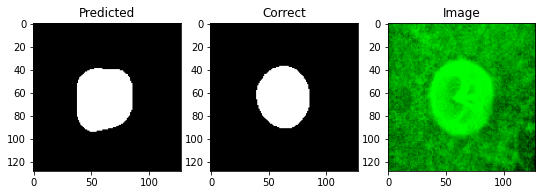

IOU: 0.8275412917137146
Dice: 0.9056334680294746
image #1


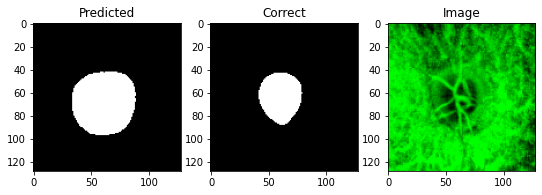

IOU: 0.5140224099159241
Dice: 0.6790156125959248
image #2


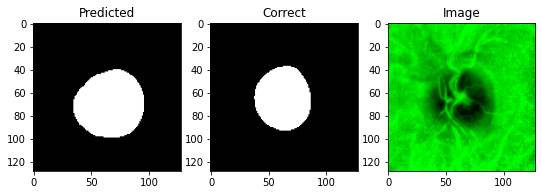

IOU: 0.6693602800369263
Dice: 0.8019362646228317
image #3


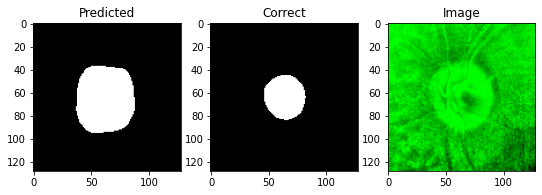

IOU: 0.43256184458732605
Dice: 0.6038997214484679
image #4


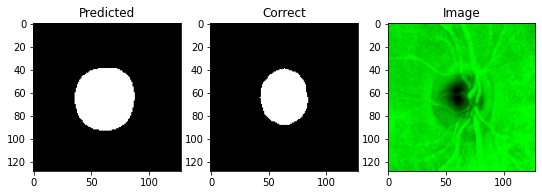

IOU: 0.6791793704032898
Dice: 0.8089420327527944
image #5


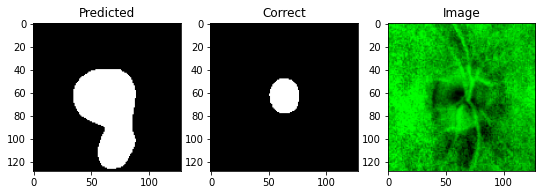

IOU: 0.19524405896663666
Dice: 0.3267015706806283
image #6


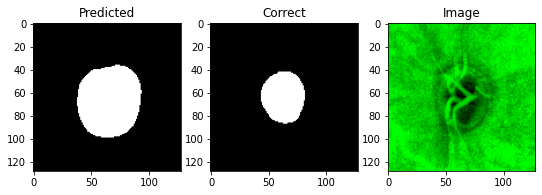

IOU: 0.4756833612918854
Dice: 0.6446956940101034
image #7


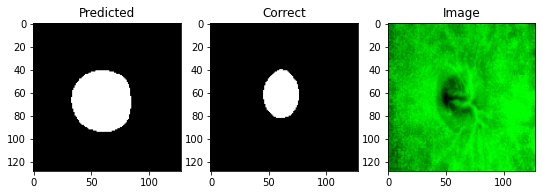

IOU: 0.4452880620956421
Dice: 0.6161928306551298
image #8


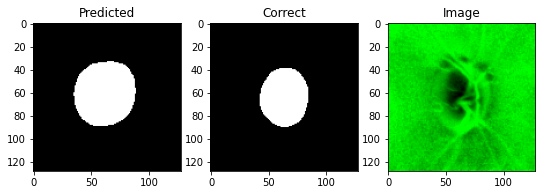

IOU: 0.6853519082069397
Dice: 0.8133042000485555
image #9


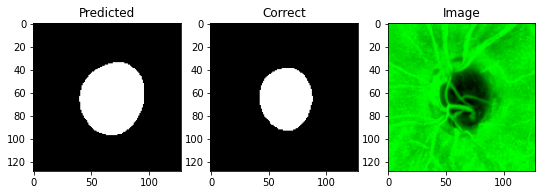

IOU: 0.7031930088996887
Dice: 0.8257349808265871
image #10


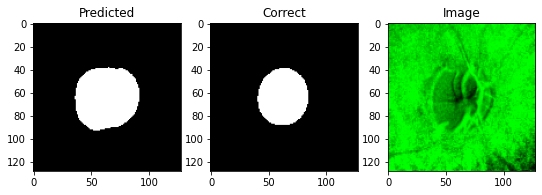

IOU: 0.6963053345680237
Dice: 0.8209669698420297
image #11


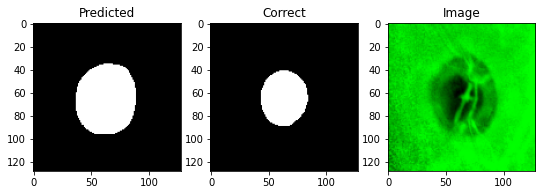

IOU: 0.588302731513977
Dice: 0.7407942238267148
image #12


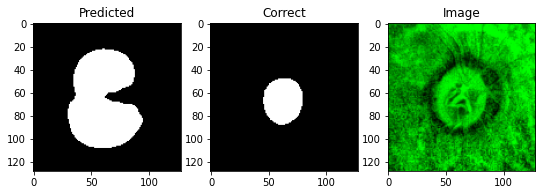

IOU: 0.2252945452928543
Dice: 0.36773940345368916
image #13


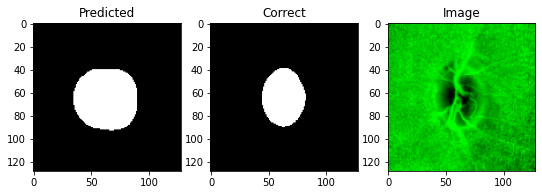

IOU: 0.5966489315032959
Dice: 0.7473765037112874
image #14


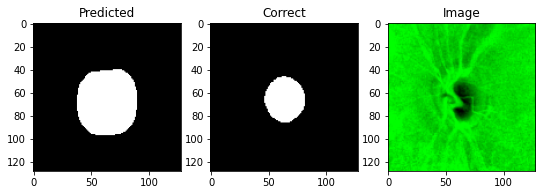

IOU: 0.4244832992553711
Dice: 0.5959821428571429
image #15


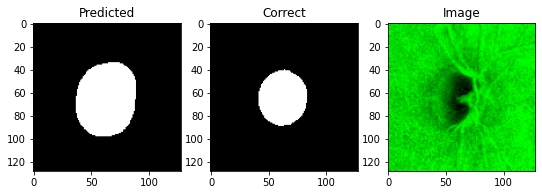

IOU: 0.581327497959137
Dice: 0.735239852398524
image #16


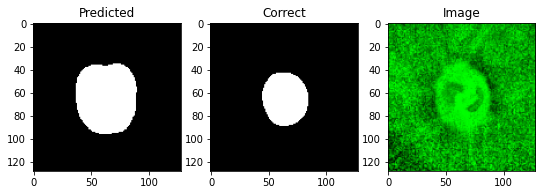

IOU: 0.5420354008674622
Dice: 0.703012912482066
image #17


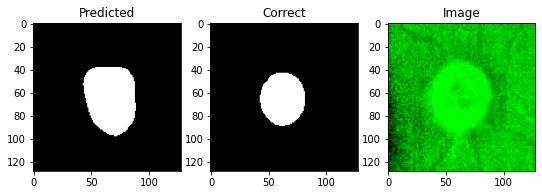

IOU: 0.6067917943000793
Dice: 0.7552836484983315
image #18


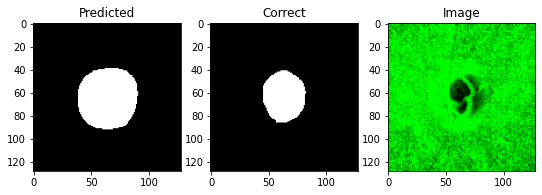

IOU: 0.570986270904541
Dice: 0.7269144144144144
image #19


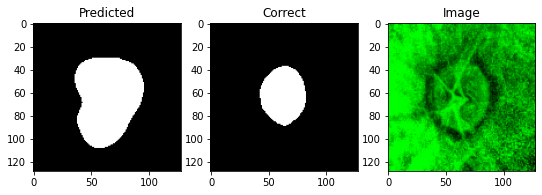

IOU: 0.4323570430278778
Dice: 0.6037000973709834
image #20


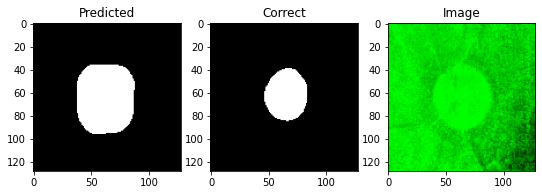

IOU: 0.49810606241226196
Dice: 0.6649810366624526
image #21


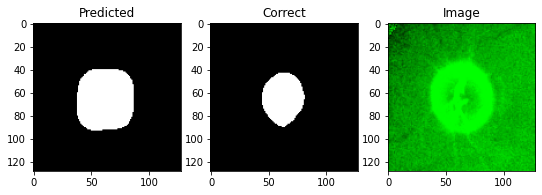

IOU: 0.5551708936691284
Dice: 0.7139677239844184
image #22


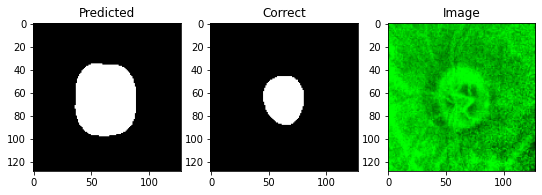

IOU: 0.41561180353164673
Dice: 0.587183308494784
image #23


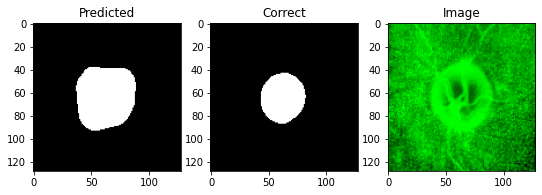

IOU: 0.5556492209434509
Dice: 0.7143631436314363
image #24


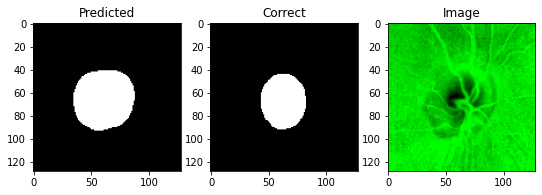

IOU: 0.6632607579231262
Dice: 0.7975427350427351
image #25


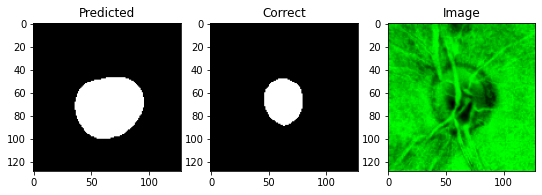

IOU: 0.4186508059501648
Dice: 0.5902097902097903
image #26


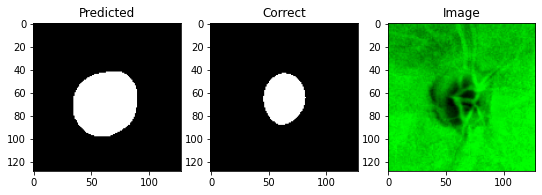

IOU: 0.49343937635421753
Dice: 0.6608093716719915
image #27


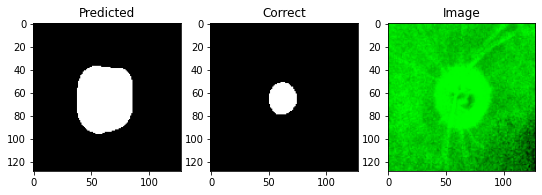

IOU: 0.21979381144046783
Dice: 0.3603786342123056
image #28


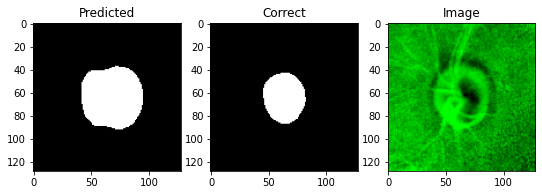

IOU: 0.5287452936172485
Dice: 0.6917375789184738
image #29


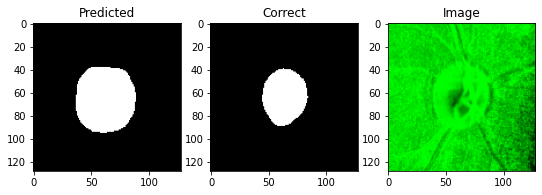

IOU: 0.6008113622665405
Dice: 0.7506335529650279
image #30


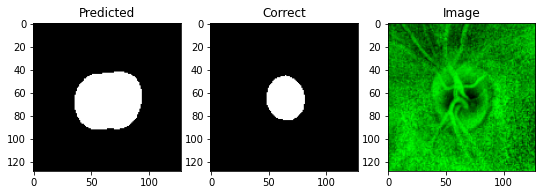

IOU: 0.40976211428642273
Dice: 0.5813209194064591
image #31


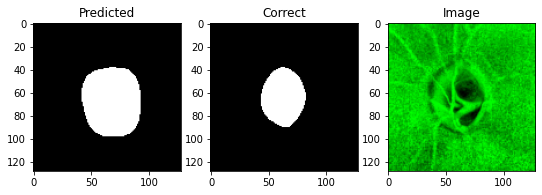

IOU: 0.5794970989227295
Dice: 0.7337741856478079
image #32


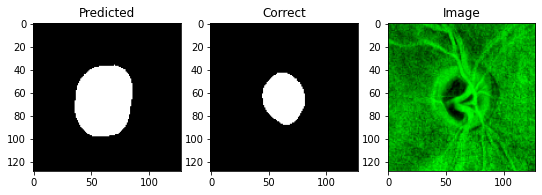

IOU: 0.48940345644950867
Dice: 0.6571805006587615
image #33


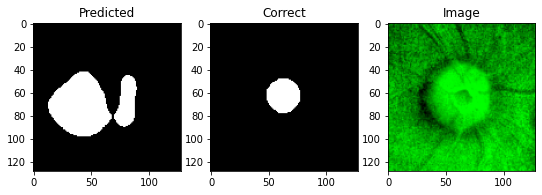

IOU: 0.09964296966791153
Dice: 0.18122786304604485
image #34


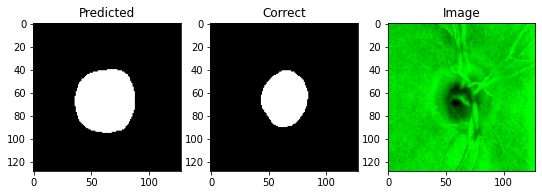

IOU: 0.6423109769821167
Dice: 0.7822038282462493
image #35


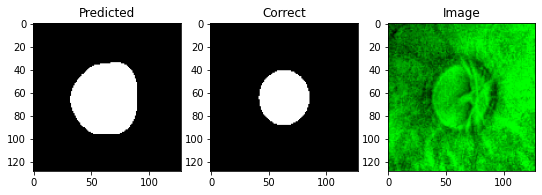

IOU: 0.5546104311943054
Dice: 0.7135040490260451
image #36


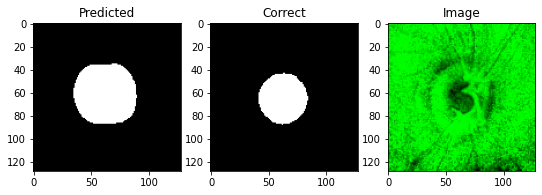

IOU: 0.6118143200874329
Dice: 0.7591623036649214
image #37


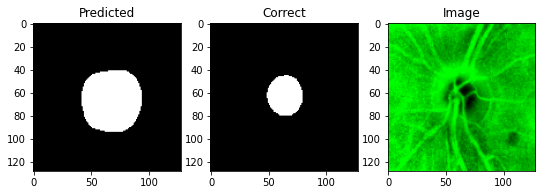

IOU: 0.3662940561771393
Dice: 0.5361862806796728
image #38


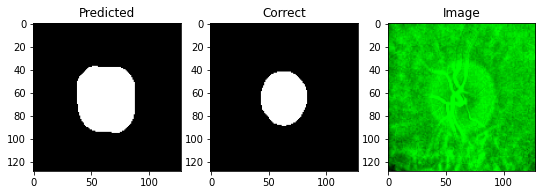

IOU: 0.5891010165214539
Dice: 0.7414267834793492
image #39


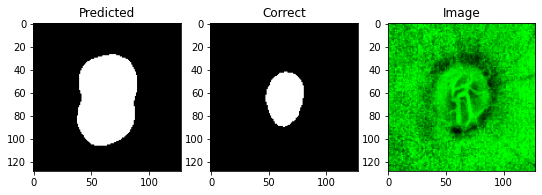

IOU: 0.3508148193359375
Dice: 0.5194121517876727
image #40


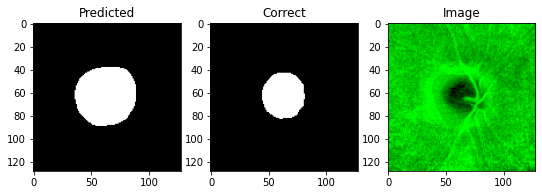

IOU: 0.5305845141410828
Dice: 0.6933096506808762
image #41


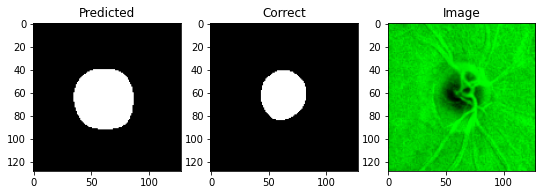

IOU: 0.5907473564147949
Dice: 0.7427293064876958
image #42


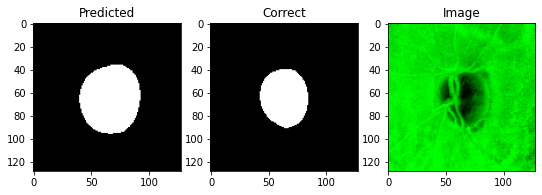

IOU: 0.6640095710754395
Dice: 0.7980838323353293
image #43


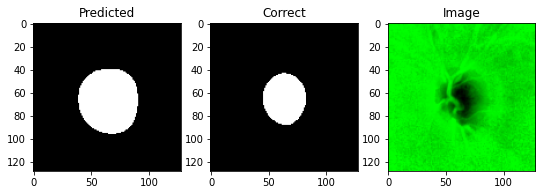

IOU: 0.5478813648223877
Dice: 0.7079113057760744
image #44


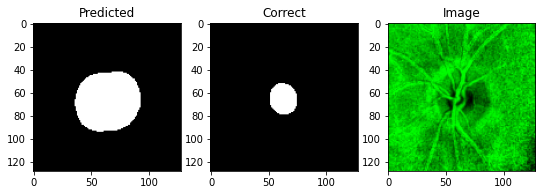

IOU: 0.21238569915294647
Dice: 0.35035995886184435
image #45


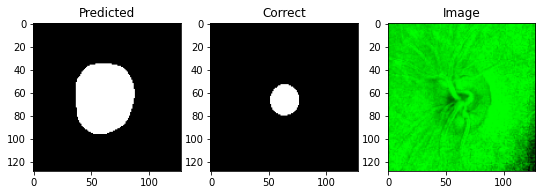

IOU: 0.2074737250804901
Dice: 0.3436492585428756
image #46


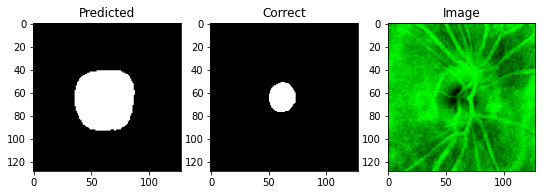

IOU: 0.20382443070411682
Dice: 0.3386281588447653
image #47


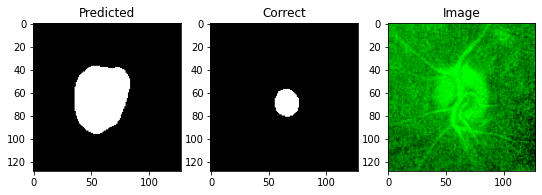

IOU: 0.17818671464920044
Dice: 0.30247619047619045
image #48


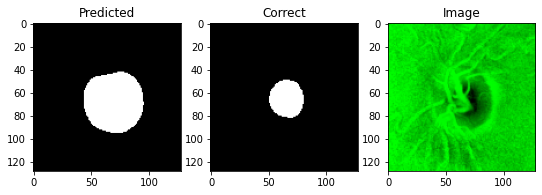

IOU: 0.3511554002761841
Dice: 0.5197853789403085
image #49


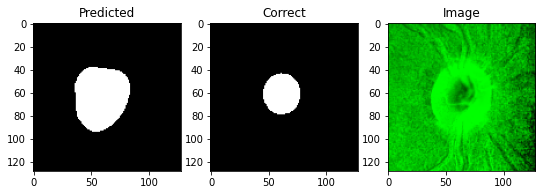

IOU: 0.4256628751754761
Dice: 0.5971438060445035
image #50


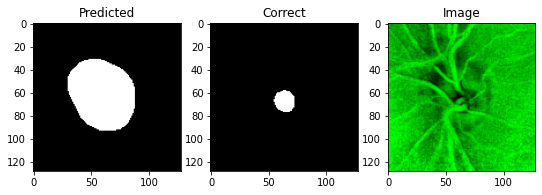

IOU: 0.09381663054227829
Dice: 0.17153996101364521


In [9]:
pred_iou, pred_dice, pred_cup = predict(sat_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.48117995
0.6299193939993369


### Training and Test disc

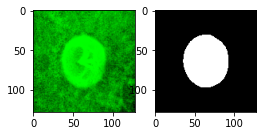

In [11]:
X_test, Z_test = next(data_generator(sat_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(sat_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_saturation', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 34s 325ms/step - loss: 1.0235 - mean_IOU_gpu: 0.0076 - dice_metric: 0.0151 - val_loss: 0.9906 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 31s 311ms/step - loss: 0.9986 - mean_IOU_gpu: 0.0019 - dice_metric: 0.0038 - val_loss: 0.9880 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 32s 321ms/step - loss: 1.0223 - mean_IOU_gpu: 9.2029e-04 - dice_metric: 0.0018 - val_loss: 0.9855 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 31s 314ms/step - loss: 1.0051 - mean_IOU_gpu: 3.3648e-04 - dice_metric: 6.7233e-04 - val_loss: 0.9841 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 32s 322ms/step - loss: 0.9800 - mean_IOU_gpu: 9.3751e-05 - dice_metric: 1.8741e-04 - val_loss: 0.9832 -

99/99 [==============================] - 32s 319ms/step - loss: 0.2266 - mean_IOU_gpu: 0.6248 - dice_metric: 0.7643 - val_loss: 1.4591 - val_mean_IOU_gpu: 0.0012 - val_dice_metric: 0.0023
Epoch 41/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1925 - mean_IOU_gpu: 0.6669 - dice_metric: 0.7957 - val_loss: 1.9635 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 42/500
99/99 [==============================] - 31s 313ms/step - loss: 0.1958 - mean_IOU_gpu: 0.6598 - dice_metric: 0.7912 - val_loss: 1.3010 - val_mean_IOU_gpu: 0.0152 - val_dice_metric: 0.0276
Epoch 43/500
99/99 [==============================] - 31s 312ms/step - loss: 0.2008 - mean_IOU_gpu: 0.6508 - dice_metric: 0.7851 - val_loss: 0.9937 - val_mean_IOU_gpu: 0.0761 - val_dice_metric: 0.1259
Epoch 44/500
99/99 [==============================] - 30s 308ms/step - loss: 0.2006 - mean_IOU_gpu: 0.6519 - dice_metric: 0.7856 - val_loss: 0.8970 - val_mean_IOU_gpu: 0.0825 - val_dice_metric: 0.1358


Epoch 81/500
99/99 [==============================] - 31s 313ms/step - loss: 0.1622 - mean_IOU_gpu: 0.6929 - dice_metric: 0.8150 - val_loss: 0.4087 - val_mean_IOU_gpu: 0.3273 - val_dice_metric: 0.4321
Epoch 82/500
99/99 [==============================] - 32s 319ms/step - loss: 0.1483 - mean_IOU_gpu: 0.7152 - dice_metric: 0.8299 - val_loss: 0.3061 - val_mean_IOU_gpu: 0.4943 - val_dice_metric: 0.5984
Epoch 83/500
99/99 [==============================] - 32s 325ms/step - loss: 0.1486 - mean_IOU_gpu: 0.7129 - dice_metric: 0.8289 - val_loss: 0.3338 - val_mean_IOU_gpu: 0.4509 - val_dice_metric: 0.5562
Epoch 84/500
99/99 [==============================] - 32s 320ms/step - loss: 0.1527 - mean_IOU_gpu: 0.7084 - dice_metric: 0.8259 - val_loss: 0.3610 - val_mean_IOU_gpu: 0.4063 - val_dice_metric: 0.5150
Epoch 85/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1653 - mean_IOU_gpu: 0.6889 - dice_metric: 0.8120 - val_loss: 0.3913 - val_mean_IOU_gpu: 0.3505 - val_dice_metric: 0.

Epoch 122/500
99/99 [==============================] - 32s 321ms/step - loss: 0.1526 - mean_IOU_gpu: 0.7033 - dice_metric: 0.8227 - val_loss: 0.3800 - val_mean_IOU_gpu: 0.4575 - val_dice_metric: 0.5544
Epoch 123/500
99/99 [==============================] - 31s 310ms/step - loss: 0.1382 - mean_IOU_gpu: 0.7277 - dice_metric: 0.8392 - val_loss: 0.2864 - val_mean_IOU_gpu: 0.6129 - val_dice_metric: 0.6883
Epoch 124/500
99/99 [==============================] - 31s 313ms/step - loss: 0.1426 - mean_IOU_gpu: 0.7206 - dice_metric: 0.8342 - val_loss: 0.4493 - val_mean_IOU_gpu: 0.3234 - val_dice_metric: 0.4286
Epoch 125/500
99/99 [==============================] - 32s 320ms/step - loss: 0.1475 - mean_IOU_gpu: 0.7154 - dice_metric: 0.8300 - val_loss: 0.4710 - val_mean_IOU_gpu: 0.2800 - val_dice_metric: 0.3831
Epoch 126/500
99/99 [==============================] - 31s 311ms/step - loss: 0.1422 - mean_IOU_gpu: 0.7198 - dice_metric: 0.8336 - val_loss: 0.3659 - val_mean_IOU_gpu: 0.4674 - val_dice_metri

99/99 [==============================] - 32s 322ms/step - loss: 0.1333 - mean_IOU_gpu: 0.7357 - dice_metric: 0.8443 - val_loss: 0.3433 - val_mean_IOU_gpu: 0.5346 - val_dice_metric: 0.6161
Epoch 163/500
99/99 [==============================] - 31s 312ms/step - loss: 0.1318 - mean_IOU_gpu: 0.7357 - dice_metric: 0.8447 - val_loss: 0.2833 - val_mean_IOU_gpu: 0.6355 - val_dice_metric: 0.7068
Epoch 164/500
99/99 [==============================] - 32s 322ms/step - loss: 0.1385 - mean_IOU_gpu: 0.7258 - dice_metric: 0.8379 - val_loss: 0.3051 - val_mean_IOU_gpu: 0.6016 - val_dice_metric: 0.6755
Epoch 165/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1236 - mean_IOU_gpu: 0.7509 - dice_metric: 0.8546 - val_loss: 0.2960 - val_mean_IOU_gpu: 0.6164 - val_dice_metric: 0.6880
Epoch 166/500
99/99 [==============================] - 31s 309ms/step - loss: 0.1356 - mean_IOU_gpu: 0.7297 - dice_metric: 0.8410 - val_loss: 0.2515 - val_mean_IOU_gpu: 0.6577 - val_dice_metric: 0.7439
Epoc

Epoch 203/500
99/99 [==============================] - 32s 322ms/step - loss: 0.1260 - mean_IOU_gpu: 0.7474 - dice_metric: 0.8523 - val_loss: 0.2032 - val_mean_IOU_gpu: 0.6999 - val_dice_metric: 0.8033
Epoch 204/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1363 - mean_IOU_gpu: 0.7256 - dice_metric: 0.8381 - val_loss: 0.2210 - val_mean_IOU_gpu: 0.7101 - val_dice_metric: 0.8126
Epoch 205/500
99/99 [==============================] - 31s 311ms/step - loss: 0.1206 - mean_IOU_gpu: 0.7555 - dice_metric: 0.8578 - val_loss: 0.2103 - val_mean_IOU_gpu: 0.7137 - val_dice_metric: 0.8051
Epoch 206/500
99/99 [==============================] - 31s 309ms/step - loss: 0.1245 - mean_IOU_gpu: 0.7423 - dice_metric: 0.8492 - val_loss: 0.2162 - val_mean_IOU_gpu: 0.7116 - val_dice_metric: 0.8163
Epoch 207/500
99/99 [==============================] - 31s 312ms/step - loss: 0.1278 - mean_IOU_gpu: 0.7426 - dice_metric: 0.8492 - val_loss: 0.2177 - val_mean_IOU_gpu: 0.7091 - val_dice_metri

99/99 [==============================] - 32s 325ms/step - loss: 0.1323 - mean_IOU_gpu: 0.7365 - dice_metric: 0.8451 - val_loss: 0.1977 - val_mean_IOU_gpu: 0.7123 - val_dice_metric: 0.8268
Epoch 244/500
99/99 [==============================] - 32s 320ms/step - loss: 0.1327 - mean_IOU_gpu: 0.7335 - dice_metric: 0.8434 - val_loss: 0.1913 - val_mean_IOU_gpu: 0.7187 - val_dice_metric: 0.8310
Epoch 245/500
99/99 [==============================] - 31s 314ms/step - loss: 0.1175 - mean_IOU_gpu: 0.7585 - dice_metric: 0.8598 - val_loss: 0.1928 - val_mean_IOU_gpu: 0.6809 - val_dice_metric: 0.8065
Epoch 246/500
99/99 [==============================] - 32s 324ms/step - loss: 0.1301 - mean_IOU_gpu: 0.7382 - dice_metric: 0.8465 - val_loss: 0.2046 - val_mean_IOU_gpu: 0.6954 - val_dice_metric: 0.8159
Epoch 247/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1331 - mean_IOU_gpu: 0.7368 - dice_metric: 0.8429 - val_loss: 0.2550 - val_mean_IOU_gpu: 0.5893 - val_dice_metric: 0.7377
Epoc

Epoch 284/500
99/99 [==============================] - 31s 309ms/step - loss: 0.1203 - mean_IOU_gpu: 0.7519 - dice_metric: 0.8559 - val_loss: 0.2474 - val_mean_IOU_gpu: 0.5880 - val_dice_metric: 0.7369
Epoch 285/500
99/99 [==============================] - 32s 322ms/step - loss: 0.1315 - mean_IOU_gpu: 0.7358 - dice_metric: 0.8443 - val_loss: 0.2192 - val_mean_IOU_gpu: 0.6635 - val_dice_metric: 0.7935
Epoch 286/500
99/99 [==============================] - 31s 312ms/step - loss: 0.1235 - mean_IOU_gpu: 0.7512 - dice_metric: 0.8548 - val_loss: 0.2371 - val_mean_IOU_gpu: 0.6104 - val_dice_metric: 0.7541
Epoch 287/500
99/99 [==============================] - 32s 320ms/step - loss: 0.1317 - mean_IOU_gpu: 0.7368 - dice_metric: 0.8447 - val_loss: 0.2235 - val_mean_IOU_gpu: 0.6445 - val_dice_metric: 0.7798
Epoch 288/500
99/99 [==============================] - 31s 313ms/step - loss: 0.1265 - mean_IOU_gpu: 0.7406 - dice_metric: 0.8485 - val_loss: 0.1966 - val_mean_IOU_gpu: 0.6954 - val_dice_metri

99/99 [==============================] - 32s 321ms/step - loss: 0.1168 - mean_IOU_gpu: 0.7588 - dice_metric: 0.8601 - val_loss: 0.2127 - val_mean_IOU_gpu: 0.6297 - val_dice_metric: 0.7691
Epoch 325/500
99/99 [==============================] - 32s 322ms/step - loss: 0.1217 - mean_IOU_gpu: 0.7508 - dice_metric: 0.8547 - val_loss: 0.2175 - val_mean_IOU_gpu: 0.6327 - val_dice_metric: 0.7712
Epoch 326/500
99/99 [==============================] - 31s 310ms/step - loss: 0.1196 - mean_IOU_gpu: 0.7571 - dice_metric: 0.8583 - val_loss: 0.1891 - val_mean_IOU_gpu: 0.6528 - val_dice_metric: 0.7866
Epoch 327/500
99/99 [==============================] - 32s 323ms/step - loss: 0.1303 - mean_IOU_gpu: 0.7410 - dice_metric: 0.8480 - val_loss: 0.2647 - val_mean_IOU_gpu: 0.5631 - val_dice_metric: 0.7178
Epoch 328/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1148 - mean_IOU_gpu: 0.7609 - dice_metric: 0.8620 - val_loss: 0.2145 - val_mean_IOU_gpu: 0.6264 - val_dice_metric: 0.7672
Epoc

Epoch 365/500
99/99 [==============================] - 32s 321ms/step - loss: 0.1145 - mean_IOU_gpu: 0.7632 - dice_metric: 0.8629 - val_loss: 0.2172 - val_mean_IOU_gpu: 0.6142 - val_dice_metric: 0.7580
Epoch 366/500
99/99 [==============================] - 32s 320ms/step - loss: 0.1132 - mean_IOU_gpu: 0.7638 - dice_metric: 0.8636 - val_loss: 0.2056 - val_mean_IOU_gpu: 0.6313 - val_dice_metric: 0.7710
Epoch 367/500
99/99 [==============================] - 31s 310ms/step - loss: 0.1154 - mean_IOU_gpu: 0.7622 - dice_metric: 0.8620 - val_loss: 0.2363 - val_mean_IOU_gpu: 0.5917 - val_dice_metric: 0.7404
Epoch 368/500
99/99 [==============================] - 32s 320ms/step - loss: 0.1105 - mean_IOU_gpu: 0.7700 - dice_metric: 0.8673 - val_loss: 0.2161 - val_mean_IOU_gpu: 0.6149 - val_dice_metric: 0.7584
Epoch 369/500
99/99 [==============================] - 31s 318ms/step - loss: 0.1121 - mean_IOU_gpu: 0.7657 - dice_metric: 0.8646 - val_loss: 0.2199 - val_mean_IOU_gpu: 0.6076 - val_dice_metri

99/99 [==============================] - 31s 313ms/step - loss: 0.1181 - mean_IOU_gpu: 0.7566 - dice_metric: 0.8590 - val_loss: 0.2137 - val_mean_IOU_gpu: 0.6168 - val_dice_metric: 0.7603
Epoch 406/500
99/99 [==============================] - 31s 311ms/step - loss: 0.1120 - mean_IOU_gpu: 0.7688 - dice_metric: 0.8665 - val_loss: 0.2821 - val_mean_IOU_gpu: 0.5399 - val_dice_metric: 0.6990
Epoch 407/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1139 - mean_IOU_gpu: 0.7608 - dice_metric: 0.8618 - val_loss: 0.2225 - val_mean_IOU_gpu: 0.6073 - val_dice_metric: 0.7532
Epoch 408/500
99/99 [==============================] - 31s 312ms/step - loss: 0.1080 - mean_IOU_gpu: 0.7736 - dice_metric: 0.8696 - val_loss: 0.2392 - val_mean_IOU_gpu: 0.5899 - val_dice_metric: 0.7396
Epoch 409/500
99/99 [==============================] - 32s 321ms/step - loss: 0.1070 - mean_IOU_gpu: 0.7764 - dice_metric: 0.8712 - val_loss: 0.2758 - val_mean_IOU_gpu: 0.5517 - val_dice_metric: 0.7087
Epoc

Epoch 446/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1140 - mean_IOU_gpu: 0.7617 - dice_metric: 0.8626 - val_loss: 0.1374 - val_mean_IOU_gpu: 0.7594 - val_dice_metric: 0.8607
Epoch 447/500
99/99 [==============================] - 33s 329ms/step - loss: 0.1077 - mean_IOU_gpu: 0.7751 - dice_metric: 0.8706 - val_loss: 0.2411 - val_mean_IOU_gpu: 0.5878 - val_dice_metric: 0.7376
Epoch 448/500
99/99 [==============================] - 31s 310ms/step - loss: 0.1076 - mean_IOU_gpu: 0.7734 - dice_metric: 0.8702 - val_loss: 0.1391 - val_mean_IOU_gpu: 0.7453 - val_dice_metric: 0.8514
Epoch 449/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1072 - mean_IOU_gpu: 0.7741 - dice_metric: 0.8705 - val_loss: 0.1319 - val_mean_IOU_gpu: 0.7678 - val_dice_metric: 0.8663
Epoch 450/500
99/99 [==============================] - 31s 316ms/step - loss: 0.1089 - mean_IOU_gpu: 0.7710 - dice_metric: 0.8681 - val_loss: 0.1428 - val_mean_IOU_gpu: 0.7462 - val_dice_metri

99/99 [==============================] - 32s 323ms/step - loss: 0.1039 - mean_IOU_gpu: 0.7794 - dice_metric: 0.8738 - val_loss: 0.1933 - val_mean_IOU_gpu: 0.6440 - val_dice_metric: 0.7806
Epoch 487/500
99/99 [==============================] - 31s 315ms/step - loss: 0.1072 - mean_IOU_gpu: 0.7748 - dice_metric: 0.8705 - val_loss: 0.1938 - val_mean_IOU_gpu: 0.6406 - val_dice_metric: 0.7782
Epoch 488/500
99/99 [==============================] - 31s 310ms/step - loss: 0.1047 - mean_IOU_gpu: 0.7788 - dice_metric: 0.8734 - val_loss: 0.1987 - val_mean_IOU_gpu: 0.6349 - val_dice_metric: 0.7739
Epoch 489/500
99/99 [==============================] - 31s 313ms/step - loss: 0.1110 - mean_IOU_gpu: 0.7670 - dice_metric: 0.8655 - val_loss: 0.1700 - val_mean_IOU_gpu: 0.6860 - val_dice_metric: 0.8107
Epoch 490/500
99/99 [==============================] - 32s 325ms/step - loss: 0.1066 - mean_IOU_gpu: 0.7771 - dice_metric: 0.8718 - val_loss: 0.1676 - val_mean_IOU_gpu: 0.6874 - val_dice_metric: 0.8116
Epoc

image #0


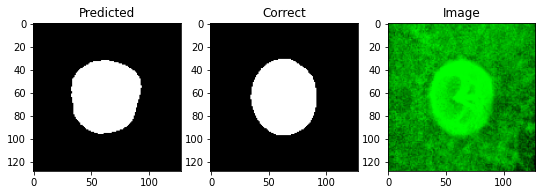

IOU: 0.892196774482727
Dice: 0.9430274925472011
image #1


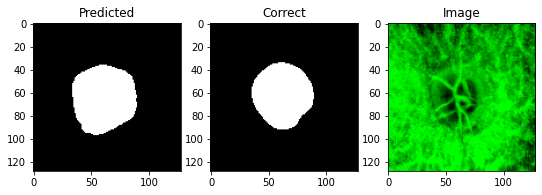

IOU: 0.8263736367225647
Dice: 0.9049338146811071
image #2


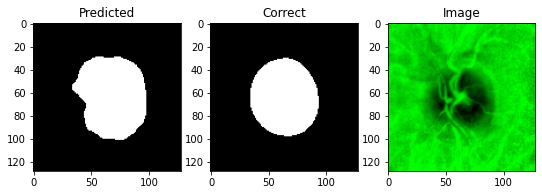

IOU: 0.792068600654602
Dice: 0.8839712918660287
image #3


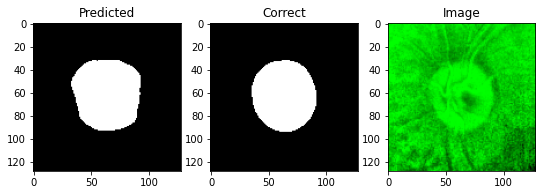

IOU: 0.8981542587280273
Dice: 0.9463448515367251
image #4


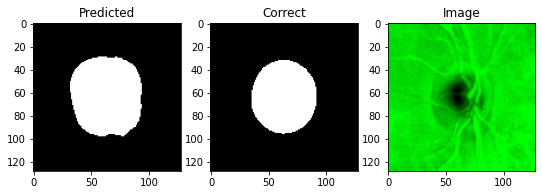

IOU: 0.7947427034378052
Dice: 0.885634153942038
image #5


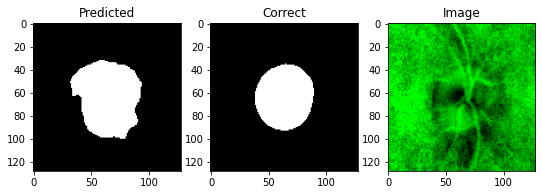

IOU: 0.7251933217048645
Dice: 0.8407096171802054
image #6


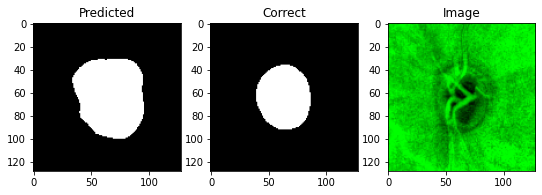

IOU: 0.6030049324035645
Dice: 0.7523431867339582
image #7


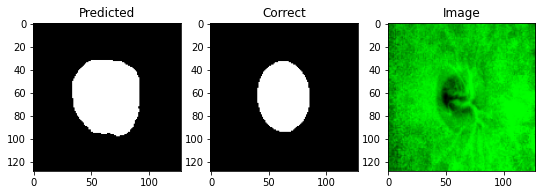

IOU: 0.6842270493507385
Dice: 0.8125116365667473
image #8


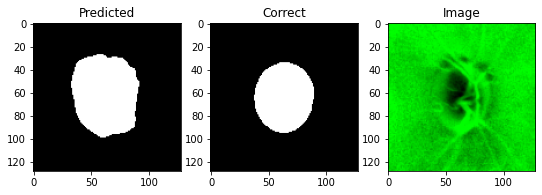

IOU: 0.7325201034545898
Dice: 0.8456122273742057
image #9


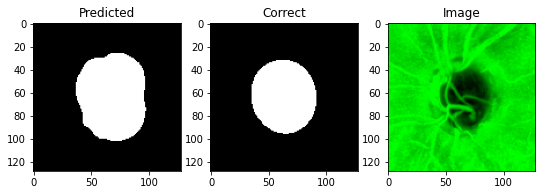

IOU: 0.72944575548172
Dice: 0.8435601458080194
image #10


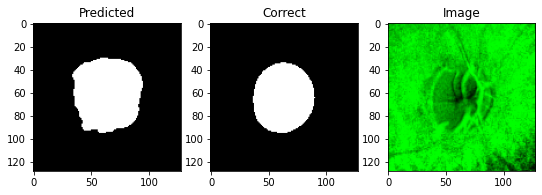

IOU: 0.7854251265525818
Dice: 0.8798185941043084
image #11


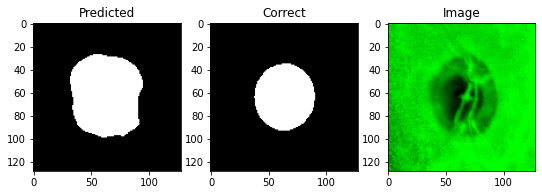

IOU: 0.6436126828193665
Dice: 0.7831683168316832
image #12


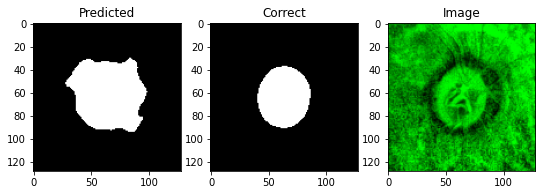

IOU: 0.5819448828697205
Dice: 0.735733435465339
image #13


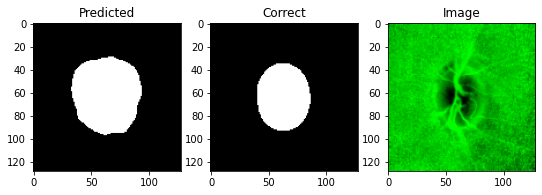

IOU: 0.6674907207489014
Dice: 0.8005930318754633
image #14


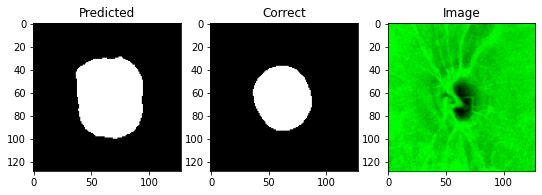

IOU: 0.6372092962265015
Dice: 0.7784090909090909
image #15


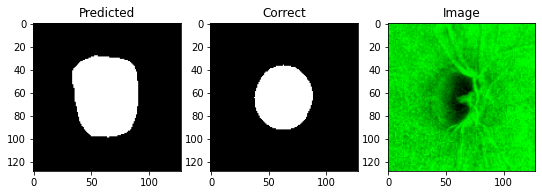

IOU: 0.6467632055282593
Dice: 0.7854963202297612
image #16


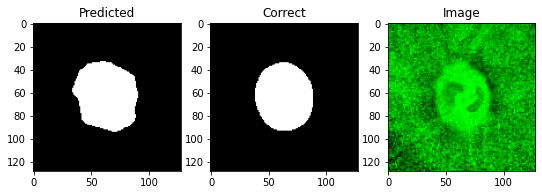

IOU: 0.8769230842590332
Dice: 0.9344262295081968
image #17


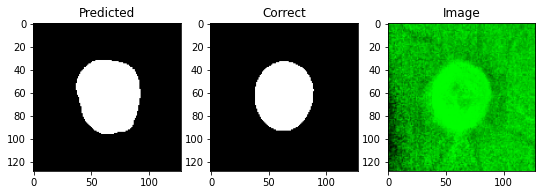

IOU: 0.8229813575744629
Dice: 0.9028960817717206
image #18


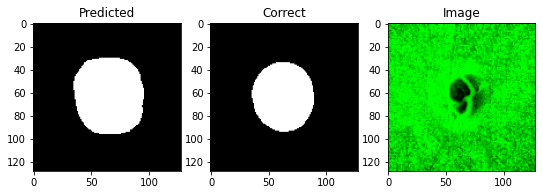

IOU: 0.7556346654891968
Dice: 0.8608108108108108
image #19


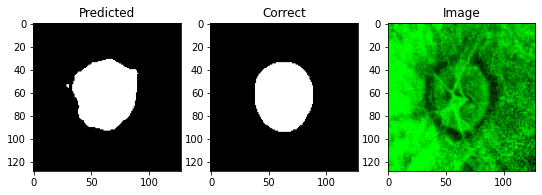

IOU: 0.863935649394989
Dice: 0.9270015698587127
image #20


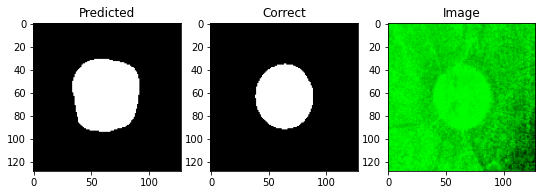

IOU: 0.7239001989364624
Dice: 0.8398400304703866
image #21


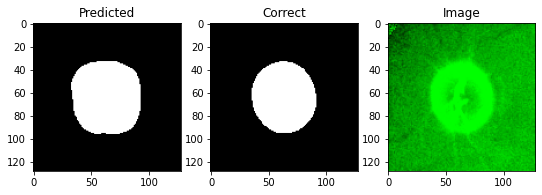

IOU: 0.8470114469528198
Dice: 0.9171696847753186
image #22


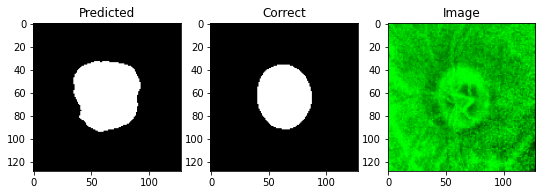

IOU: 0.7397162914276123
Dice: 0.8503872808805544
image #23


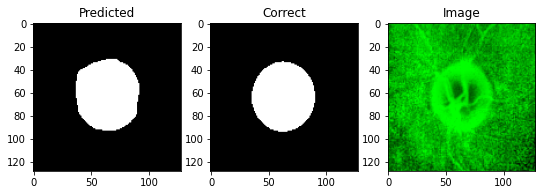

IOU: 0.8949224352836609
Dice: 0.9445478228507629
image #24


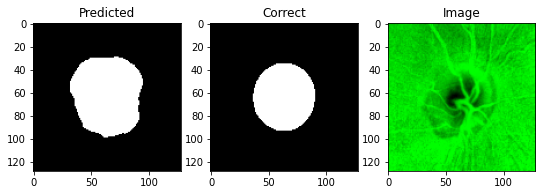

IOU: 0.7185056209564209
Dice: 0.8361981799797775
image #25


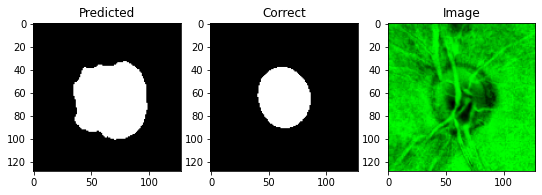

IOU: 0.5442964434623718
Dice: 0.7049118860142483
image #26


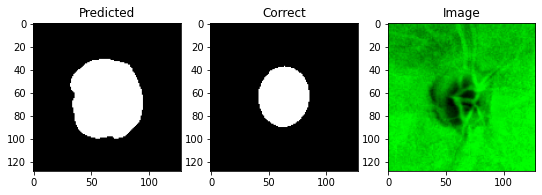

IOU: 0.5132064819335938
Dice: 0.6783033033033034
image #27


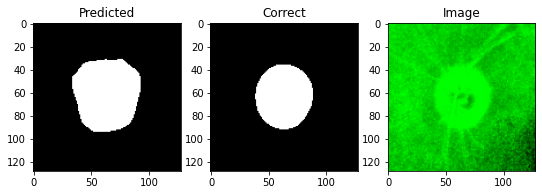

IOU: 0.7303856611251831
Dice: 0.8441882804995197
image #28


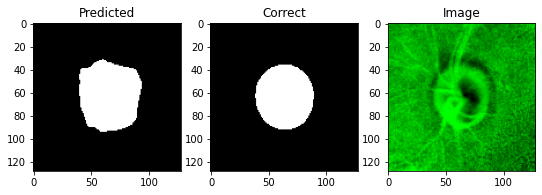

IOU: 0.8238112926483154
Dice: 0.9033953112368633
image #29


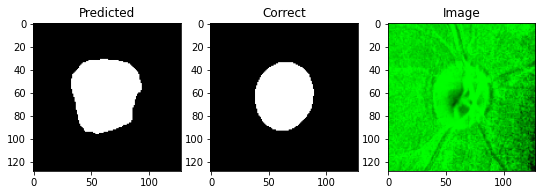

IOU: 0.7653359174728394
Dice: 0.8670711527854384
image #30


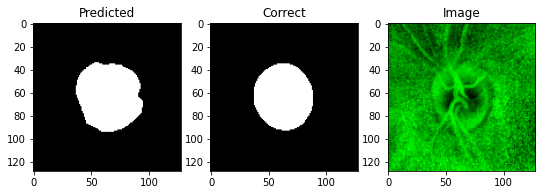

IOU: 0.8403361439704895
Dice: 0.91324200913242
image #31


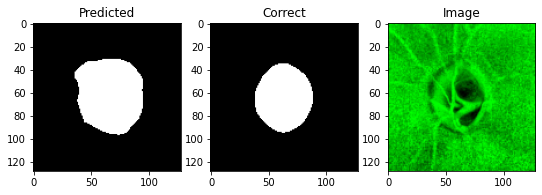

IOU: 0.718471348285675
Dice: 0.8361749444032617
image #32


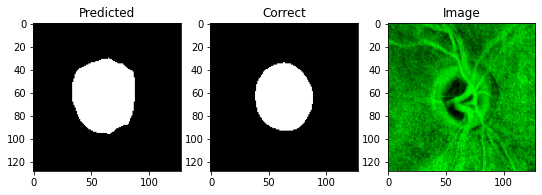

IOU: 0.7957252860069275
Dice: 0.8862439024390244
image #33


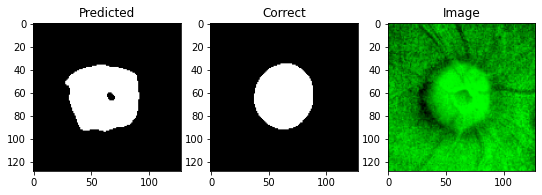

IOU: 0.7424547076225281
Dice: 0.8521939953810623
image #34


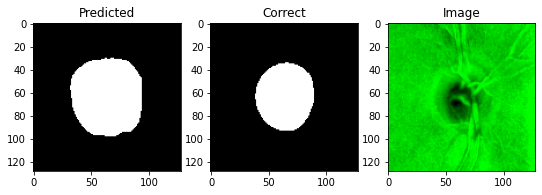

IOU: 0.6754587292671204
Dice: 0.8062970568104039
image #35


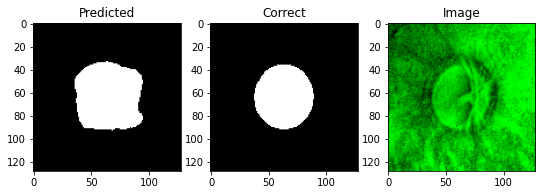

IOU: 0.7645664215087891
Dice: 0.8665770781339989
image #36


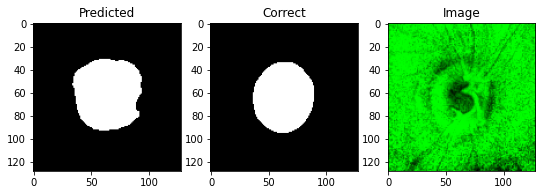

IOU: 0.8199083209037781
Dice: 0.9010435408420295
image #37


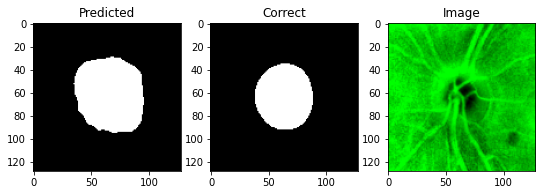

IOU: 0.7028447985649109
Dice: 0.8254948247684765
image #38


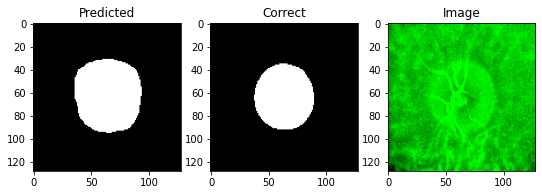

IOU: 0.7653796076774597
Dice: 0.8670991658943467
image #39


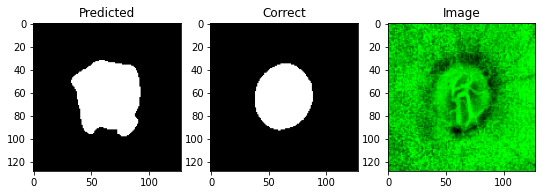

IOU: 0.7306930422782898
Dice: 0.8443935926773455
image #40


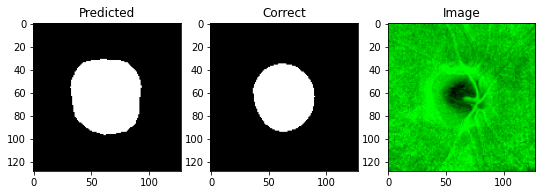

IOU: 0.7352317571640015
Dice: 0.8474162011173184
image #41


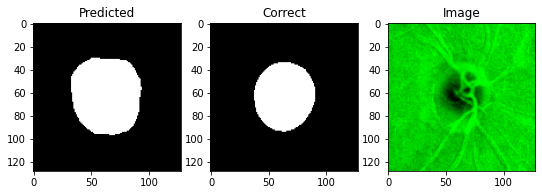

IOU: 0.7397791743278503
Dice: 0.8504288164665523
image #42


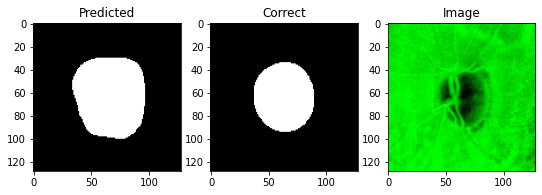

IOU: 0.6837095618247986
Dice: 0.8121466645130028
image #43


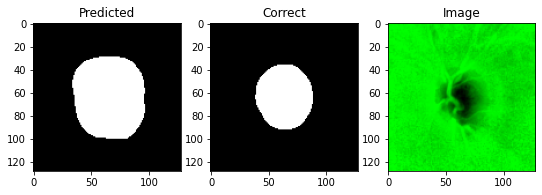

IOU: 0.5841505527496338
Dice: 0.7374937259494729
image #44


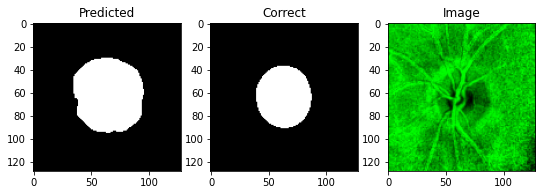

IOU: 0.6377264261245728
Dice: 0.778794813119756
image #45


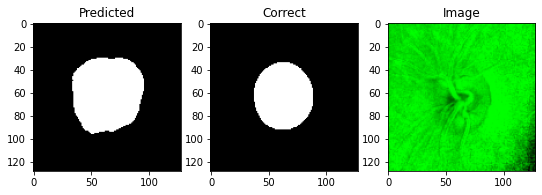

IOU: 0.7136842012405396
Dice: 0.8329238329238329
image #46


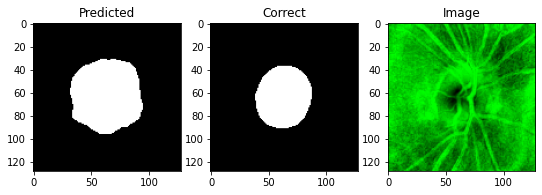

IOU: 0.645370364189148
Dice: 0.7844682048396173
image #47


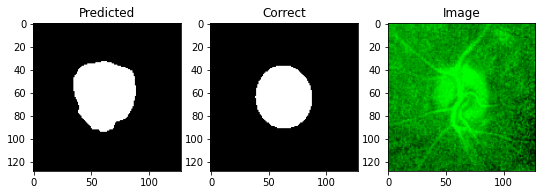

IOU: 0.7822735905647278
Dice: 0.8778378378378379
image #48


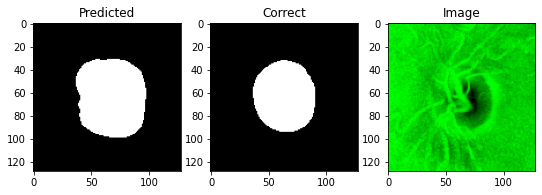

IOU: 0.7442585825920105
Dice: 0.8533810143042913
image #49


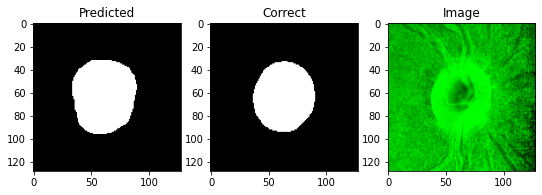

IOU: 0.8433490991592407
Dice: 0.915018315018315
image #50


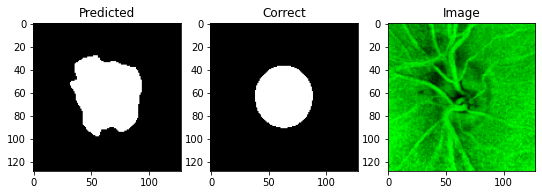

IOU: 0.6698442697525024
Dice: 0.8022835394862036


In [13]:
pred_iou, pred_dice, pred_disc = predict(sat_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.7371796
0.8455679982050209


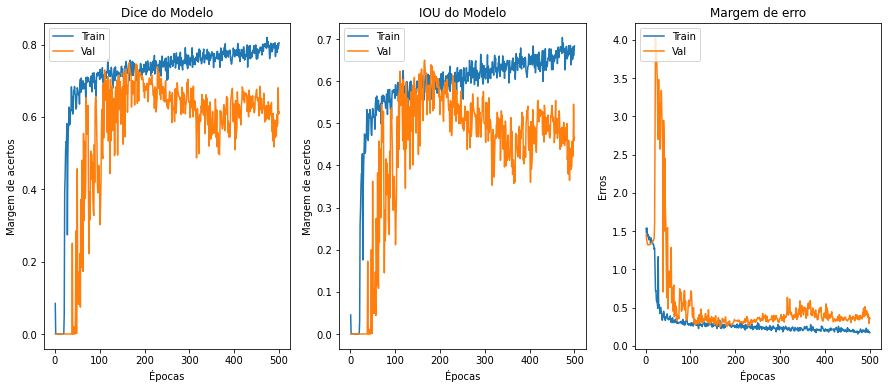

In [15]:
plot_results(history_cup, epochs)

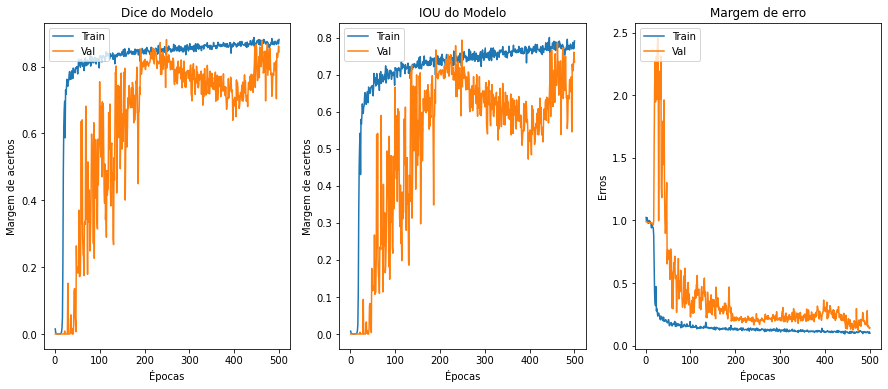

In [16]:
plot_results(history_disc, epochs)

In [17]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)


image #0 - cdr = 0.8865422852044653
image #1 - cdr = 0.955329841465165
image #2 - cdr = 0.8282613888577213
image #3 - cdr = 0.951842025370236
image #4 - cdr = 0.7739818661240897
image #5 - cdr = 1.3033534221224705
image #6 - cdr = 0.8769223999517626
image #7 - cdr = 0.7959405213890818
image #8 - cdr = 0.7881064444277609
image #9 - cdr = 0.8189730004694271
image #10 - cdr = 0.874638925481874
image #11 - cdr = 0.8424000411617285
image #12 - cdr = 1.2945705262223361
image #13 - cdr = 0.836834823002102
image #14 - cdr = 0.8140386122660669
image #15 - cdr = 0.8967081989044127
image #16 - cdr = 1.0124531653157165
image #17 - cdr = 0.9492892949376732
image #18 - cdr = 0.7911124942009496
image #19 - cdr = 1.3336386222429644
image #20 - cdr = 0.9811210439281943
image #21 - cdr = 0.8546662071914958
image #22 - cdr = 1.0557672627986148
image #23 - cdr = 0.9285513697603415
image #24 - cdr = 0.7714512047357001
image #25 - cdr = 0.9060986520254615
image #26 - cdr = 0.8375204604942545
image #27 - cdr

In [18]:
pd.DataFrame(data= result)

cdr      area
0   0.886542  0.736500
1   0.955330  0.936585
2   0.828261  0.796385
3   0.951842  0.832005
4   0.773982  0.640660
5   1.303353  1.041721
6   0.876922  0.813927
7   0.795941  0.700847
8   0.788106  0.719726
9   0.818973  0.737885
10  0.874639  0.774772
11  0.842400  0.709520
12  1.294571  1.214480
13  0.836835  0.753708
14  0.814039  0.734170
15  0.896708  0.810523
16  1.012453  1.028441
17  0.949289  0.758681
18  0.791112  0.670522
19  1.333639  1.348251
20  0.981121  0.866710
21  0.854666  0.715701
22  1.055767  1.008511
23  0.928551  0.852624
24  0.771451  0.651028
25  0.906099  0.729589
26  0.837520  0.714286
27  0.935341  0.806184
28  0.890186  0.883902
29  0.883459  0.802670
30  0.984522  0.902295
31  0.917452  0.826338
32  0.993266  0.901947
33  0.856003  0.929210
34  0.810745  0.674885
35  1.018728  0.995596
36  0.875948  0.787305
37  0.801039  0.719233
38  0.928571  0.822644
39  1.234340  1.121262
40  0.807883  0.668585
41  0.782459  0.670845
42  0.818757  0.682350
43  0.763270  0.625497
44  0.878013  0.751405
45  0.922532  0.772632
46  0.844281  0.710185
47  1.015467  0.880981
48  0.738213  0.633104
49  0.865114  0.729030
50  0.956460  0.895893

In [19]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm  disc - dM
0   50.792923  57.510494  60.805584  64.870560
1   55.172440  58.016598  56.833542  60.729389
2   57.933895  62.457355  60.842484  75.407784
3   52.591248  61.259384  60.171150  64.358772
4   52.499744  55.768791  63.651855  72.054390
5   50.932121  91.302994  57.655537  70.052368
6   55.933163  64.466408  61.109829  73.514381
7   52.493870  54.390358  59.990742  68.334702
8   53.059799  58.224785  58.714069  73.879341
9   55.134666  63.983147  61.529819  78.126076
10  53.900940  58.581997  61.611336  66.978493
11  53.068523  62.955746  63.801769  74.733788
12  61.080631  91.002060  62.651150  70.295174
13  54.638138  57.148651  60.893513  68.291435
14  53.992863  59.682808  60.156803  73.316925
15  52.552685  66.662003  58.830818  74.340797
16  54.777683  63.685329  54.030712  62.902000
17  45.022270  63.199989  55.473297  66.576111
18  52.390507  55.227978  61.810658  69.810524
19  58.661606  81.821739  57.321121  61.352257
20  52.841156  64.359016  59.702316  65.597427
21  52.190342  56.992573  62.023136  66.684013
22  55.124081  66.129181  58.356743  62.636135
23  52.539143  58.601940  56.489643  63.111145
24  51.919422  55.404701  62.186703  71.818802
25  52.905117  61.235939  66.240219  67.581978
26  53.679436  59.933914  63.224457  71.561134
27  51.061302  61.186993  59.462616  65.416794
28  54.788528  55.962818  55.820068  62.866467
29  53.328518  59.212933  59.748318  67.023972
30  51.394539  60.805782  56.326996  61.761738
31  52.528927  62.900764  58.901840  68.560272
32  50.548019  64.467064  55.930931  64.904106
33  50.804550  55.305027  59.149467  64.608444
34  53.063313  56.756580  63.813190  70.005478
35  58.495522  64.518623  61.176842  63.332523
36  53.908939  56.223938  60.655643  64.186401
37  53.567238  55.620064  59.849171  69.434898
38  52.959946  61.025021  59.577942  65.719284
39  52.542522  83.230415  59.630955  67.429077
40  51.469189  54.903656  62.347973  67.959915
41  52.712151  54.500027  61.830471  69.652237
42  52.778622  60.776203  63.795067  74.229851
43  52.582161  57.463593  64.231194  75.286064
44  52.287796  58.764862  61.451561  66.929367
45  52.143860  63.245998  62.502872  68.556961
46  53.493137  55.290993  63.770237  65.488853
47  47.141510  61.449352  54.409000  60.513393
48  52.920105  53.469604  61.937206  72.431129
49  48.010208  57.410934  56.145947  66.362289
50  53.878517  66.846199  59.998627  69.889153